In [1]:
import requests
res = requests.get(http://www.appledaily.com.tw/realtimenews/section/new/1/')
#print res.text
print res.status_code 
print res.headers['content-type']


200
text/html; charset=utf-8


# 使用爬蟲蒐集每日頻果要聞

In [7]:
import requests
from bs4 import BeautifulSoup
import re
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
for news in soup.select('.rtddt'):
    print news

<li class="rtddt fun">
<a href="/realtimenews/article/fun/20150526/616690/再暗也不會尿歪！美男發明螢光馬桶蓋" target="_blank">
<time>00:20</time>
<h2>FUN</h2>
<h1><font color="#383c40">再暗也不會尿歪！ 美男發明螢光馬桶蓋(0)</font></h1>
</a>
</li>
<li class="rtddt animal even hsv">
<a href="/realtimenews/article/animal/20150526/616719/孤單的小鹿　一眼認定燙傷貓" target="_blank">
<time>00:20</time>
<h2>動物</h2>
<h1><font color="#383c40">孤單的小鹿　一眼認定燙傷貓(0)</font></h1>
</a>
</li>
<li class="rtddt local">
<a href="/realtimenews/article/local/20150526/616781/柯P地盤近百黑衣人砸服飾店" target="_blank">
<time>00:20</time>
<h2>社會</h2>
<h1><font color="#383c40">柯P地盤近百黑衣人砸服飾店(17994)</font></h1>
</a>
</li>
<li class="rtddt fun even">
<a href="/realtimenews/article/fun/20150526/616699/車迷看過來10個破銅爛鐵搞出的酷玩意兒" target="_blank">
<time>00:19</time>
<h2>FUN</h2>
<h1><font color="#383c40">車迷看過來 10個破銅爛鐵搞出的酷玩意兒(0)</font></h1>
</a>
</li>
<li class="rtddt sport">
<a href="/realtimenews/article/sports/20150526/616794/台灣一哥盧彥勳法網首戰　周二下午5點FOX現場直播" target="_blank">
<time>00:17</

In [6]:
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    category = news.select('h2')[0].text 
    time = news.select('time')[0].text 
    url = domain + news.select('a')[0]['href']    

In [9]:
import requests
from bs4 import BeautifulSoup
import re
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
domain = 'http://www.appledaily.com.tw'
newsary = []
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    category = news.select('h2')[0].text 
    time = news.select('time')[0].text 
    url = domain + news.select('a')[0]['href']
    dic = {'title': title, 'popularity':popularity,'category':category, 'time':time, 'url':url}
    newsary.append(dic)

## 根據頁數蒐集

In [4]:
import requests
from bs4 import BeautifulSoup

domain = 'http://www.appledaily.com.tw'
'''
newsary = []
url = 'http://www.appledaily.com.tw/realtimenews/section/new/%d'
for page in range(1,2):
    section = requests.get(url%(page))
    soup = BeautifulSoup(section.text)
    for news in soup.select('.rtddt a'):
        newsary.append(domain + news['href'])
'''

"\nnewsary = []\n\nfor page in range(1,2):\n    section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/%d'%(page))\n    soup = BeautifulSoup(section.text)\n    for news in soup.select('.rtddt a'):\n        newsary.append(domain + news['href'])\n"

- https://gist.github.com/bryanyang0528/dcca5614e144ad89acde
- http://bryannotes.blogspot.tw/2014/07/python-n-gram.html
- http://tm.itc.ntnu.edu.tw/CNLP/?q=node/5
- http://wiki.swarma.net/index.php?title=%E4%BD%BF%E7%94%A8python%E8%BF%9B%E8%A1%8C%E6%99%AE%E9%80%82%E8%AE%A1%E7%AE%97&variant=zh-tw
- http://wiki.swarma.net/index.php/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86%E4%B8%8E%E6%83%85%E6%84%9F%E5%88%86%E6%9E%90#Python_.E4.BB.A3.E7.A0.81.E5.8F.8A.E7.A4.BA.E4.BE.8B.EF.BC.9A.E4.BD.BF.E7.94.A8.E6.9C.B4.E7.B4.A0.E8.B4.9D.E5.8F.B6.E6.96.AF.E6.A8.A1.E5.9E.8B.E5.88.A4.E5.88.AB.E8.AE.BA.E5.9D.9B.E5.B8.96.E5.AD.90.E6.98.AF.E5.90.A6.E8.BE.B1.E9.AA.82.E6.80.A7
http://www.dotblogs.com.tw/rickyteng/archive/2013/10/07/123389.aspx

## 印出蒐集新聞

In [18]:
print len(newsary)

30


In [26]:
print newsary[0:3]

[{'category': u'\u653f\u6cbb', 'url': u'http://www.appledaily.com.tw/realtimenews/article/politics/20150524/615860/\u6c11\u9032\u9ee8\u570b\u9632\u85cd\u76ae\u66f8\u3000\u88c1\u9000\u8f14\u6703\u3001\u589e\u8a2d\u7db2\u8ecd', 'popularity': 0, 'time': u'10:38', 'title': u'\u6c11\u9032\u9ee8\u570b\u9632\u85cd\u76ae\u66f8\u3000\u88c1\u9000\u8f14\u6703\u3001\u589e\u8a2d\u7db2\u8ecd'}, {'category': u'\u793e\u6703', 'url': u'http://www.appledaily.com.tw/realtimenews/article/local/20150524/615807/\u96d9\u5317\u9023\u65e5\u5927\u96e8\u3000\u677f\u6a4b\u8def\u6a39\u8f5f\u7136\u5012', 'popularity': 7075, 'time': u'10:36', 'title': u'\u96d9\u5317\u9023\u65e5\u5927\u96e8\u3000\u677f\u6a4b\u8def\u6a39\u8f5f\u7136\u5012'}, {'category': u'\u641c\u5947', 'url': u'http://www.appledaily.com.tw/realtimenews/article/strange/20150524/615867/\u6b6a\u8170\uff5e\u6e96\u5cb3\u6bcd\u8dcc\u72d7\u5403\u5c4e\u3000\u7f8e\u7537\u6d6a\u6f2b\u6c42\u5a5a\u6210\u9b27\u5287', 'popularity': 0, 'time': u'10:36', 'title': u

In [10]:
for news in newsary[0:3]:
    print news['category'], news['title'], news['popularity']

FUN 神設計餐盤  讓料理好有戲 0
娛樂 梁詠琪噴嚏嚇哭女兒　愛犬舔baby腳底呼... 0
動物 好不容易獲救　隔天後卻馬上… 0


# 使用pandas 做敘述性統計

In [12]:
import pandas as pd
newspd = pd.DataFrame(newsary)
newspd.head()

,category,popularity,time,title,url
0,FUN,0,00:28,神設計餐盤 讓料理好有戲,http://www.appledaily.com.tw/realtimenews/arti...
1,娛樂,0,00:28,梁詠琪噴嚏嚇哭女兒 愛犬舔baby腳底呼...,http://www.appledaily.com.tw/realtimenews/arti...
2,動物,0,00:28,好不容易獲救 隔天後卻馬上…,http://www.appledaily.com.tw/realtimenews/arti...
3,生活,0,00:27,美妝即期品開賣 每人只能買2件,http://www.appledaily.com.tw/realtimenews/arti...
4,娛樂,90,00:25,準爸爸池城 今搶百想戲王,http://www.appledaily.com.tw/realtimenews/arti...


## 根據人氣排序

In [13]:
newspd.sort(['popularity'], ascending=False).head()

,category,popularity,time,title,url
12,社會,22141,00:21,【囂張】柯P地盤近百黑衣人砸服飾店,http://www.appledaily.com.tw/realtimenews/arti...
24,娛樂,3442,00:10,【狗仔偷拍】安室缺席Jolin慶功宴 獨...,http://www.appledaily.com.tw/realtimenews/arti...
18,娛樂,836,00:15,【今日壽星】伊東美咲《電車男》走紅 躍升...,http://www.appledaily.com.tw/realtimenews/arti...
26,FUN,798,00:09,【旅途中】老巷弄咖啡廳 是有這麼誇張嗎？,http://www.appledaily.com.tw/realtimenews/arti...
19,動物,696,00:14,獵殺老犀牛 是為了防止犀牛絕種？,http://www.appledaily.com.tw/realtimenews/arti...


## 依據各分類排行

In [19]:
#import sys
#pd.options.display.encoding = 'utf-8'
df1 = newspd.groupby(['category'], sort=False)['popularity'].max()
print df1

category
FUN           798
娛樂           3442
動物            696
生活              0
社會          22141
體育             23
論壇            398
瘋啥            476
Name: popularity, dtype: int64


## 抓出各分類最熱門文章

In [21]:
idx = newspd.groupby(['category'])['popularity'].transform(max) == newspd['popularity']
newspd[idx].head()

,category,popularity,time,title,url
3,生活,0,00:27,美妝即期品開賣 每人只能買2件,http://www.appledaily.com.tw/realtimenews/arti...
12,社會,22141,00:21,【囂張】柯P地盤近百黑衣人砸服飾店,http://www.appledaily.com.tw/realtimenews/arti...
16,體育,23,00:17,台灣一哥盧彥勳法網首戰 周二下午5點FO...,http://www.appledaily.com.tw/realtimenews/arti...
19,動物,696,00:14,獵殺老犀牛 是為了防止犀牛絕種？,http://www.appledaily.com.tw/realtimenews/arti...
24,娛樂,3442,00:10,【狗仔偷拍】安室缺席Jolin慶功宴 獨...,http://www.appledaily.com.tw/realtimenews/arti...


## 印出每日新聞摘要

In [53]:
for newsurl in newsary[0:1]:    
    res = requests.get(newsurl['url'])
    soup = BeautifulSoup(res.text)
    print soup.select('#summary')[0].text

民進黨後天將公布「國防政策藍皮書」第9、10、11、12號等4份報告，除提出裁撤退輔會的構想外，也要成立陸海空三軍之外的「第4軍種」，以資電作戰為主，編階為上將司令，肩負捍衛台灣的「數位國土」。民進黨前國安人士透露，前總統陳水扁任內進行的「玉山兵推」，在駭客僅用10分之1的能量，即可在3小時內將中華電信癱瘓，顯示政府的網路的數位作戰不勘一擊。民進黨國防小組成員表示，為使國防相關的資產與基礎設施設施免於組織性駭客與恐怖份子的網路侵襲，民進黨主席蔡英文在當選總統後，將會首先規劃成立「第4軍種」，將國軍目前的情報次長室、通資次長室、電展室、資電作戰指揮部等單位完成整合，以規劃以上將司令的編階，讓國軍的網路部隊能夠真正有錢、有權、有戰場的方式，強化國軍的網軍部隊戰力。對於兵役制度方面，藍皮書雖然沒有強調綠委蕭美琴提出的「恢復徵兵制」議題，但為滿足部隊需求，將目前實施的役男4個月的軍事訓練役，進行強化。將目前僅在新訓中心的軍事訓練役改成新訓結束後即會分發部隊，參與部隊的實際訓練，增加部隊見習的機會。此外，國軍目前推動人事精簡的「勇固案」，藍皮書明確指出，蔡英文當選後將「暫不實施」。而包括兵役制度在內的所有國防改革相關政策，選後進行開放的討論，在取得社會與朝野共識後，會在執政10個月後的第一本「四年期國防總檢討」中定案發佈。也將基於尊重軍事專業的客觀文人領軍精神，由身負聯合作戰指揮官之參謀總長主導下，發佈台灣首次的「國家軍事戰略」、「國防產業發展策略」並形成四年更新一次的慣例，達到全民國防的落實。而在裁撤退輔會方面，藍皮書指出，輔導會改隸國防部為長期目標。現階段以強化跨部會的協調整合；長程方面，在下一階段政府改造時，研擬將輔導會改隸國防部，由軍政副部長主管或另設副部長，並成立「退伍軍人事務總局」。此次一次公布4本藍皮書，包括第9號「2025年台灣軍事防衛能量」、第10號「資訊保護與戰略溝通」、第11號「精進退輔制度」、第12號「本土國防產業發展的準備」。新境界文教基金會國防政策諮詢小組表示，藍皮書主要是提供民進黨未來執政的方向，原本即規劃在5月底公布，但為避免距離總統大選愈接近，而曲解民進黨所提出的國防政策議題，才會一次公布4本。據透露，此次國防政策藍皮書的擬定，包括有陸、海、空三軍的退役上將都有參與意見的提供及政策的擬定，國防政策諮詢小組強調，就是希望藍皮書所提的內容都是切實

In [76]:
for newsurl in newsary:    
    res = requests.get(newsurl['url'])
    soup = BeautifulSoup(res.text)
    newsurl['summary'] = soup.select('#summary')[0].text

In [79]:
print newsary[0]['summary'][0:100]

民進黨後天將公布「國防政策藍皮書」第9、10、11、12號等4份報告，除提出裁撤退輔會的構想外，也要成立陸海空三軍之外的「第4軍種」，以資電作戰為主，編階為上將司令，肩負捍衛台灣的「數位國土」。民進黨


## 從Facebook 討論區了解網民評論

In [34]:
import urllib
import json
print newsary[3]['url']
app_id = '409090199295451'
app_secret = '376c1f23cbb1435959a51959d809f5e9'
graph_url  = 'https://graph.facebook.com/v2.3/%s?access_token=%s|%s'%(urllib.quote(newsary[0]['url'].encode('utf8')), app_id, app_secret)
res = requests.get(graph_url)
dt = json.loads(res.text)
post_id =  dt['og_object']['id']
print post_id

http://www.appledaily.com.tw/realtimenews/article/life/20150526/616767/美妝即期品開賣　每人只能買2件
951523721608408


C:\Python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [39]:
post_id = '938417442844934'
import urllib
import json
import pandas as pd
app_id = '409090199295451'
app_secret = '376c1f23cbb1435959a51959d809f5e9'
post_url  = 'https://graph.facebook.com/v2.3/%s/comments?access_token=%s|%s'%(post_id, app_id, app_secret)
res = requests.get(post_url)
json_data = json.loads(res.text)
#print json_data['data']
#df = pd.read_json(json_data['data'])



C:\Python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [40]:
print json_data

{u'paging': {u'cursors': {u'after': u'Mg==', u'before': u'NA=='}}, u'data': [{u'from': {u'id': u'10204704242467035', u'name': u'Joy Chien'}, u'like_count': 0, u'can_remove': False, u'created_time': u'2015-05-25T17:44:09+0000', u'message': u'\u770b\u5f71\u7247\u767c\u73fe\u5c0f\u8ca8\u8eca\u6703\u6025\u715e\u6253\u6ed1\n\u662f\u56e0\u70ba\u524d\u8eca\u6025\u715e\n\u5c0f\u8ca8\u8eca\u6253\u6ed1\u5f8c\u524d\u8eca\u715e\u8eca\u71c8\u9084\u4eae\u8457\n\u7136\u5f8c\u98db\u901f\u5f80\u524d\u884c\u99db\n\u6240\u4ee5\u96e8\u5929\u8eca\u591a\u6642\u9084\u662f\u76e1\u91cf\u4fdd\u6301\u5b89\u5168\u8ddd\u96e2\u5427', u'id': u'938417442844934_938572532829425', u'user_likes': False}, {u'from': {u'id': u'1006511392693378', u'name': u'Daniel Shih'}, u'like_count': 1, u'can_remove': False, u'created_time': u'2015-05-25T15:48:54+0000', u'message': u'\u9019\u500b\u8def\u6bb5\u4e09\u5929\u5169\u982d\u7684\u5c31\u6709\u4e8b\u6545\u767c\u751f,\u660e\u660e\u662f\u9053\u8def\u8a2d\u8a08\u4e0d\u826f\u537b\u4e00

In [41]:
dtarray = []
for comment in json_data['data']:
    dtarray.append( {'created_time':comment['created_time'], 'name':comment['from']['name'], \
          'message':comment['message'], 'like_count':comment['like_count']})
posts_df = pd.DataFrame(dtarray)
posts_df.head()

,created_time,like_count,message,name
0,2015-05-25T17:44:09+0000,0,看影片發現小貨車會急煞打滑\n是因為前車急煞\n小貨車打滑後前車煞車燈還亮著\n然後飛速往前...,Joy Chien
1,2015-05-25T15:48:54+0000,1,"這個路段三天兩頭的就有事故發生,明明是道路設計不良卻一直擺著不去改善!\n因為車流量過大常常...",Daniel Shih
2,2015-05-25T13:06:45+0000,0,又是貨車界的神車出糗了。,Reginald Ben


# 使用資料庫管理新聞內容

## 建立表格存放新聞

In [185]:
# -*- coding: utf-8 -*- 
import sqlite3

db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('''DROP TABLE news_entry''')
cur.execute('''CREATE TABLE IF NOT EXISTS news_entry(
                id INTEGER PRIMARY KEY,
                category TEXT,
                popularity INTEGER,
                time VARCHAR(32),
                title VARCHAR(256),
                summary TEXT,
                url VARCHAR(1024)
                )''')
cur.close()

## 新增一筆資料進SQLite

In [191]:
col = ', ' .join(newsary[0].keys())
val = ','.join('?'* (len(newsary[0].keys())))

sql = 'insert into news_entry(%s) values(%s)'%(col, val)
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute(sql,newsary[0].values())
cur.execute('select * from news_entry')
rec = cur.fetchone()
print rec[4]            
cur.close()
db.close()

民進黨國防藍皮書　裁退輔會、增設網軍


## 將全部資料放進SQLite

In [196]:

db = sqlite3.connect('news.db') 

cur = db.cursor()

delete_sql = 'delete from news_entry'
cur.execute(delete_sql)

for news in newsary:
    col = ', ' .join(news.keys())
    val = ','.join('?'* (len(news.keys())))
    sql = 'insert into news_entry(%s) values(%s)'%(col, val)
    cur.execute(sql,news.values())
    db.commit()
          
cur.close()
db.close()

## 讀取表格中的所有資料

In [20]:
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
for rec in allNews:
    #print rec[0], rec[1], rec[2], rec[3], rec[4]
    print rec[3]
cur.close()
db.close()

NameError: name 'sqlite3' is not defined

- http://blog.fukuball.com/ru-he-shi-yong-jieba-jie-ba-zhong-wen-fen-ci-cheng-shi/
- https://github.com/fxsjy/jieba
- http://www.cnblogs.com/chenbjin/p/3851165.html
- http://blog.csdn.net/whzhcahzxh/article/details/25059227
- http://blog.sina.com.cn/s/blog_778fe3e40101leu9.html
    

## 產生 2-gram

In [175]:
input_sentence='那我們酸民婉君也可以報名嗎'

sentence  = input_sentence.decode('utf-8')

for i in range(0, len(sentence) - 2 + 1):
    print sentense[i:i+2]

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嗎


## 產生 3-gram

In [176]:
for i in range(0, len(sentence) -3 + 1):
    print sentense[i:i+3]

那我們
我們酸
們酸民
酸民婉
民婉君
婉君也
君也可
也可以
可以報
以報名
報名嗎


## 建立 n-gram 函式

In [43]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

## 測試 bigram

In [45]:
for word in ngram('酸民婉君也可以報名嗎'):
    print word,

婉君 報名 可以 名嗎 君也 也可 民婉 酸民 以報


## 測試 trigram

In [437]:
for word in ngram('那我們酸民婉君也可以報名嗎?' ,n=3):
    print word

酸民婉
君也可
名嗎?
可以報
也可以
們酸民
以報名
民婉君
報名嗎
那我們
婉君也
我們酸


## 移除標點符號

In [235]:
sentence = '123?'
skip_word = '.?'
len([word for word in sentence if word in skip_word]) > 0

True

In [267]:
skip_dic = '?.,、　「！】？：《」》～【'.decode('utf-8')
def ngram(input_sentence, n = 2, skip_word= skip_dic):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        invalid = len([word for word in sentence[i:i+n] if word in skip_word])
        if sentence[i:i+n] not in word_dic and invalid ==0:
            word_dic[sentence[i:i+n]] = 1
        elif invalid ==0:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

In [248]:
for word in ngram('那我們酸民、婉君也可以報名嗎?'):
    print word

我們
婉君
報名
們酸
可以
名嗎
君也
也可
那我
酸民
以報


In [428]:
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
dic = {}
for rec in allNews:
    ngram_dic = ngram(rec[4])
    for ele in ngram_dic:
        if ele not in dic:
            dic[ele] = ngram_dic[ele]
        else:
            dic[ele] = dic[ele] + ngram_dic[ele]
cur.close()
db.close()

In [429]:
import operator
words_freq = sorted(dic.iteritems(),key=operator.itemgetter(1),reverse=True)
    
for word in words_freq:
    if word[1] >= 2:
        print word[0], word[1]

.. 14
企】 3
【特 3
柯P 3
特企 3
體驗 2
巨蛋 2
路跑 2
桃園 2
南部 2
15 2
P： 2
5分 2
00 2
50 2
大巨 2


# 長詞優先演算法

## 如何依標點符號切開字詞

In [337]:
import re
delimiter = "，|。|、"  
text = '3年前就讀高雄應用大學二年級的陳顯佳，為閃避跨越雙黃線來車，撞上路邊、摔斷頸椎，頸部以下全癱，嘴被插管，父母每天去看他，他都意識清醒、眨眼流淚，17天後他因頸椎受損抑制呼吸，醫師用盡強力針與電擊都無效，'
for i in re.split(delimiter, text):
    print i

3年前就讀高雄應用大學二年級的陳顯佳
為閃避跨越雙黃線來車
撞上路邊
摔斷頸椎
頸部以下全癱
嘴被插管
父母每天去看他
他都意識清醒
眨眼流淚
17天後他因頸椎受損抑制呼吸
醫師用盡強力針與電擊都無效



## 測試切除效果

In [364]:
def splitSentense(text, delimiter):
    return re.split(delimiter, text)
    
delimiter = "，|。|、|（|）|／|《|》|】|【|「|」|；|：".decode('utf-8')  
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
sentenceAry = []
for rec in allNews:
    text = rec[5]
    sentenceAry += splitSentense(text,delimiter)
cur.close()
db.close()

In [369]:
for sentence in sentenceAry[0:8]:
    print sentence

民進黨後天將公布
國防政策藍皮書
第9
10
11
12號等4份報告
除提出裁撤退輔會的構想外
也要成立陸海空三軍之外的


## 移除關鍵字

In [379]:
def removeKey(text, keyword):
    textAry= text
    for key in keyword:
        textAry = ''.join(textAry.split(key.decode('utf-8')))
    return textAry
print sentenceAry[0]
print removeKey(sentenceAry[0], ['民進黨', '後天'])

民進黨後天將公布
將公布


In [ ]:

a = '民進黨後天將公布'
removeKey(a, ['民進黨', '後天'])

## 修改ngram 處理函式

In [392]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence
    for i in range(0, len(sentence) - n + 1):        
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

## 依長詞優先產生關鍵字

In [425]:
keywords=[]        
ret_terms={}
words_freq    = []
for term_length in range(4,1,-1):
    word_dic = {}
    for sentence in sentenceAry:
        text_list = removeKey(sentence,keywords)        
        ngram_words = ngram(text_list,term_length) 
        for word in ngram_words:
            if word not in word_dic:
                word_dic[word] = 1
            else:
                word_dic[word] += ngram_words[word]   
    for word in word_dic:
        if word_dic[word] >= 5:
            keywords.append(word.encode('utf-8'))            
            ret_terms.update({word:word_dic[word]})

sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 
for term in sorted_terms[0:30]:
    print term[0], term[1]

表示 26
沒有 22
報導 19
活動 17
10 17
台灣 17
累積降雨 16
毫米 16
00 15
積降雨量 15
今天 15
跑者 15
路跑 14
炎亞綸 14
一個 13
進行 13
青棒 13
大巨蛋 13
新聞 13
現場 12
甲子園 12
棒球 12
蘋果 12
的人 11
玉山盃 11
可以 11
他的 11
中華 11
30 10
可能 10


## 使用jieba

In [2]:
import jieba

sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Dumping model to file cache c:\users\david\appdata\local\temp\jieba.cache
DEBUG:jieba:Dumping model to file cache c:\users\david\appdata\local\temp\jieba.cache
Loading model cost 1.66599988937 seconds.
DEBUG:jieba:Loading model cost 1.66599988937 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


大
巨蛋
案對
市府
同仁
下
封口令
？
　
柯
P
否認


In [4]:
jieba.add_word('柯P',100)
jieba.add_word('大巨蛋',100)
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

大巨蛋
案對
市府
同仁
下
封口令
？
　
柯P
否認


In [5]:
import jieba.posseg as pseg
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = pseg.cut(sentence)

for word in words:
    print word.word, word.flag

大巨蛋 x
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　x
柯P x
否認 v


In [13]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]

 大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　14 15
柯P 15 17
否認 17 19


In [16]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 1)
print ",".join(tags)

封口令


In [18]:
sentence = "由身負聯合作戰指揮官之參謀總長主導下"
words = jieba.cut(sentence)
for word in words:
    print word

由身
負聯
合作
戰指揮官
之
參謀
總長
主導下


In [25]:
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)         
for i in vectorizer.get_feature_names():
    print i

柯p
洪智坤


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()    
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    
word = vectorizer.get_feature_names() 
weight = tfidf.toarray()    
print weight

[[ 0.70710678  0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]]


In [10]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
domain = 'http://www.appledaily.com.tw'
worddic = {}
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    for wd in jieba.cut(title):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1


In [15]:
for w in dic

{u'\u8981': 1, u'\u3000': 23, u'\u7b26\u5408': 1, u'\u640d\u5bb3': 1, u'\u640d\u53e4': 1, u'\u81ea\u7531': 1, u'\u3010': 10, u'\u6b7b\u4ea1': 1, u'\u8d85\u795e': 1, u'\u79d1\u5927': 1, u'\u8da8\u52e2': 1, u'\u7121\u5e38': 1, u'\u5929\u6c23': 1, u'\uff1a': 4, u'\u574d\u65b9': 1, u'\u6b63\u6676': 1, u'\u9ed1\u767d': 1, u'\u733f\u9ede': 1, u'\u82b1\u908a': 1, u'\u5370\u5ea6': 1, u'\u67cf\u5357\u514b': 2, u'\u53f0\u7063': 1, u'\u83dc\u78bc': 1, u'\u53c3\u52a0': 1, u'\u842c': 1, u'\u7247\u5834': 1, u'\u5230': 1, u'\u4e2d\u8077': 1, u'\u6821\u5712': 1, u'\u7834': 1, u'\u62d4\u8349': 1, u'\u53cd\u601d': 1, u'\u5206\u91cf': 1, u'\u7562\u696d\u751f': 1, u'...': 9, u'\u300a': 2, u'F1': 1, u'\u7d66\u8b49\u66f8': 1, u'\u67b6': 1, u'\u6230\u5ef6\u8cfd': 1, u'\u5efa\u7bc9\u7cfb': 1, u'\u300c': 3, u'\u5e36\u5098': 1, u'\u4e0d\u65b7': 1, u'\u7a69\u5b9a': 1, u'\u5f35\u570b': 1, u'\u5927\u96e8': 1, u'\u8cc7\u672c': 1, u'Just': 1, u'\u6771\u6d77': 1, u'\u9f13\u6d6a': 1, u'\u5468': 1, u'\u7f8e\u5143': 1, 

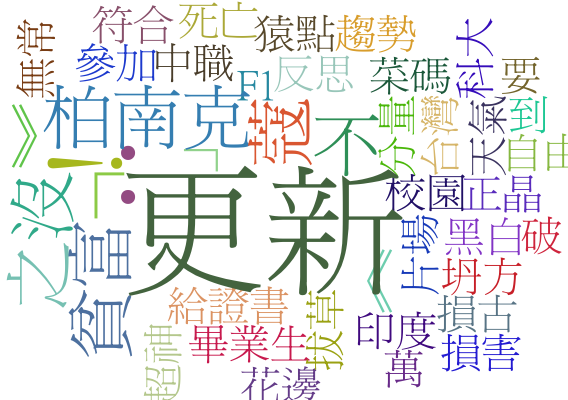

In [23]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50] if w[0] not in '【】...'.decode('utf-8')]

tags = make_tags(swd, maxsize=120)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='tw')
Image(filename='wc.png') 
